In [1]:
%matplotlib inline

import jax.numpy as jnp
from jax import value_and_grad
from jax import random
from scipy.optimize import minimize
from jax.random import PRNGKey
import matplotlib.pyplot as plt
import seaborn as snb


from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


# we want to use 64 bit floating precision
import jax
jax.config.update("jax_enable_x64", True)

snb.set_style('darkgrid')
snb.set_theme(font_scale=1.25)


## Task 2.1


(100, 2)


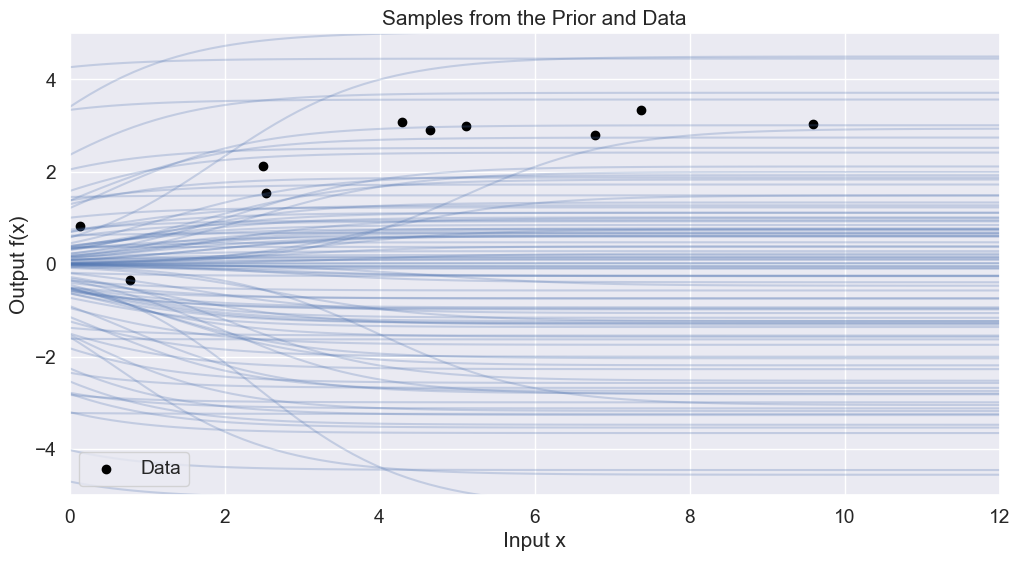

In [13]:
key = PRNGKey(0)
N = 10 
X = jnp.array([9.589, 7.375, 4.647, 2.501, 2.538, 6.783, 4.294, 5.111, 0.130, 0.783]).ravel()
y = jnp.array([3.032, 3.349, 2.906, 2.126, 1.538, 2.787, 3.078, 2.993, 0.828,-0.331]).ravel()

tau, beta = 2, 4


## TASK 2.1 ##
f = lambda w, x: w[1] / (1 + jnp.exp(-(x + w[0]) ) )

S = 100  #num of samples
mean = jnp.array([0, 0])

cov = jnp.array([[tau ** 2, 0],
                 [0, tau ** 2]])

w_samples = random.multivariate_normal(key,
                                       mean,
                                       cov,
                                       shape=(100,))

x_samples = jnp.linspace(-2, 12, 100)

f_samples = [f(w_samples[i], x_samples) for i in range(0,S)]


fig, ax = plt.subplots(1,1, figsize=(12,6))
for i in range(S):
    plt.plot(x_samples, f_samples[i], color= "b", alpha= 0.25)
ax.scatter(X, y, color="black", label="Data")
ax.set(xlabel="Input x", ylabel="Output f(x)")
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(-5,5)
plt.title("Samples from the Prior and Data")
plt.grid(True)


zz= w_samples[0]
print(w_samples.shape)

## Task 2.3

In [ ]:
log_npdf = lambda x, m, v: -0.5 * jnp.log(2 * jnp.pi * v) - 0.5 * (x - m) ** 2 / v

def log_joint(w, x, y):
    a = log_npdf(w[0], 0, tau ** 2)
    b = log_npdf(w[1], 0, tau ** 2)
    c = jnp.sum( log_npdf(y, f(w,x), beta ** -1))
    return a + b + c

w = jnp.array([0,0])
log_joint(w, X, y)

Array(-130.94934095, dtype=float64)

In [27]:
# Simplified expression of the log joint for w= [0,0], just to double check the result
-jnp.log(2 * jnp.pi * tau ** 2)- 5*jnp.log(jnp.pi / 2)  -2*jnp.sum(y **2 )

Array(-130.94934095, dtype=float64)